## 📈 Analyzing Stock Performances

This notebook provides technical analysis for multiple stocks using interactive Plotly charts and indicators RSI, MACD, Bollinger Bands, and Moving Averages.


### ✅ Setup


In [1]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


### Import libraries

In [35]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objs as go
from plotly.subplots import make_subplots

### 📊 Define functions to calculate the indicators RSI, MACD

In [4]:
# Function to calculate RSI
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate the MACD
def calculate_macd(df, short_window=12, long_window=26, signal_window=9):
    # Calculate the short-term EMA
    short_ema = df['Close'].ewm(span=short_window,adjust=False).mean() 
    #Calculate the long-term EMA
    long_ema = df['Close'].ewm(span=long_window, adjust=False).mean() 
    #Calculate the MACD line
    macd = short_ema - long_ema 
    #Calculate the signal line
    signal = macd.ewm(span = signal_window, adjust=False).mean() 
    return macd , signal

def supports(df):
    df[df.Low==df.Low.rolling(5,center=True).min()].Low
    
def resistances(df):
    df[df.High==df.High.rolling(5,center=True).max()].High

### Define function to generate buy sell trading signals 

In [4]:
# Function to generate trading signals
def generate_signals(df):
    buy_signals = []
    sell_signals = []
    for i in range(len(df)):
        if df['RSI'].iloc[i] < 40 and df['MACD'].iloc[i] > df['Signal'].iloc[i]:
            buy_signals.append(df['Close'].iloc[i])
            sell_signals.append(np.nan)
        elif df['RSI'].iloc[i] > 60 and df['MACD'].iloc[i] < df['Signal'].iloc[i]:
            buy_signals.append(np.nan)
            sell_signals.append(df['Close'].iloc[i])
        else:
            buy_signals.append(np.nan)
            sell_signals.append(np.nan)
    return buy_signals, sell_signals


### 🔍 Run Analysis for Each Stock

In [37]:
# Yahoo Finance Tickers
tickers = [
#     'NVDA',     # NVIDIA
#     'F',        # Ford Motor
#     'MSFT',     # Microsoft
#     'O',        # Realty Income
  'NN.AS',    # NN Group
 'SHELL.AS',  # Shell
#     'PG',       # Procter & Gamble
#     'PFE',      # Pfizer
 'ASRNL.AS', # ASR Nederland
#     'THYAO.IS', # THY 
#     'VZ',       #Verizon
#     'XOM',
#     'JNJ', # Johnson & Johnson
#     'UL', # Unilever,
#     'TMSN.IS',
#     'MRGYO.IS',
#     'PNLSN.IS',
    'AKSEN.IS',
    'ETH-USD'
    
]


📊 Processing NN.AS...


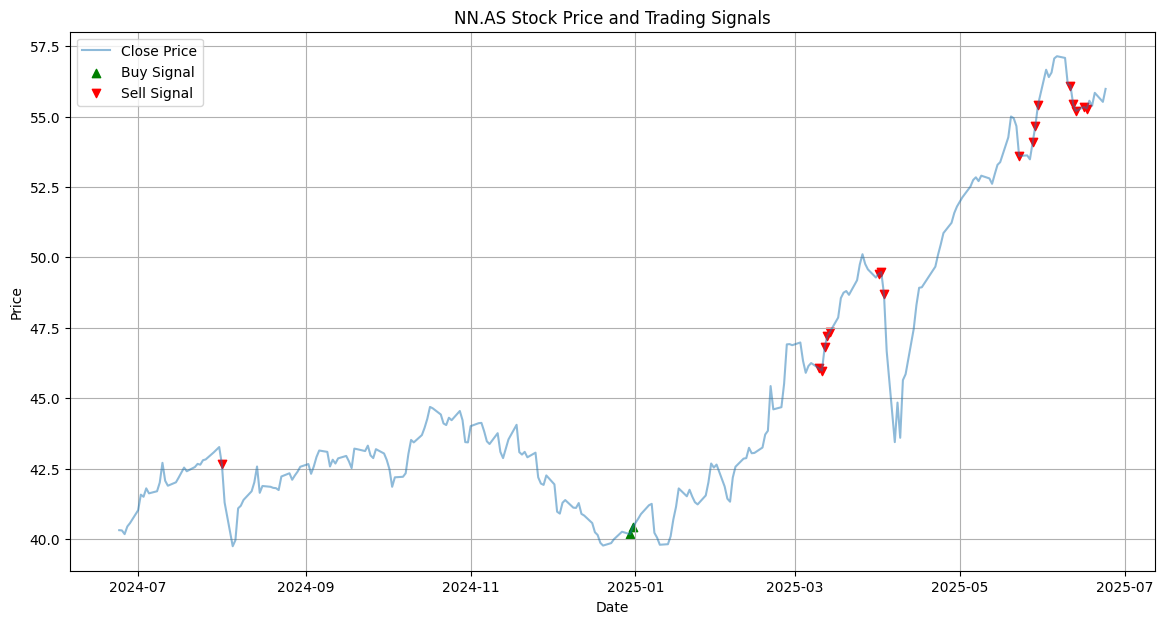


📊 Processing ASRNL.AS...


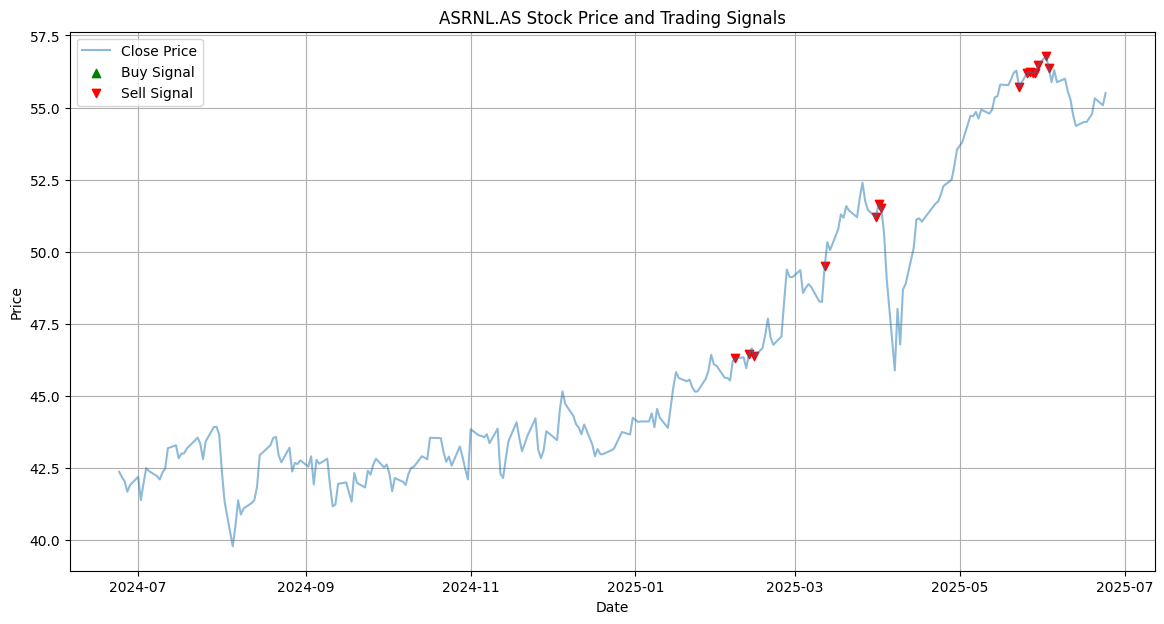


📊 Processing AKSEN.IS...


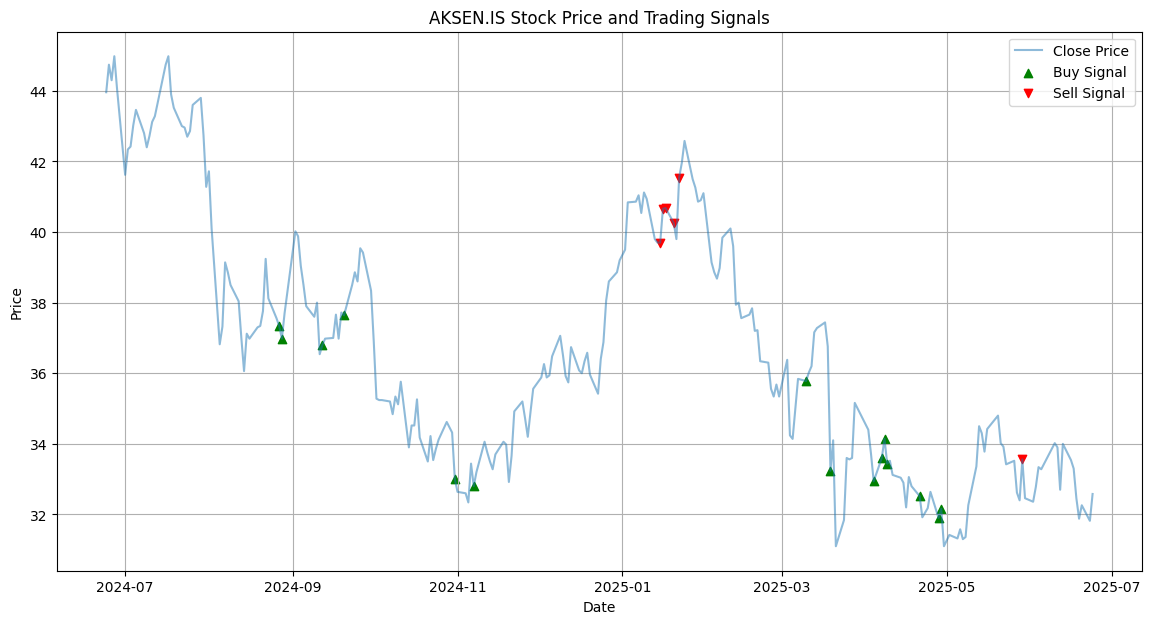


📊 Processing ETH-USD...


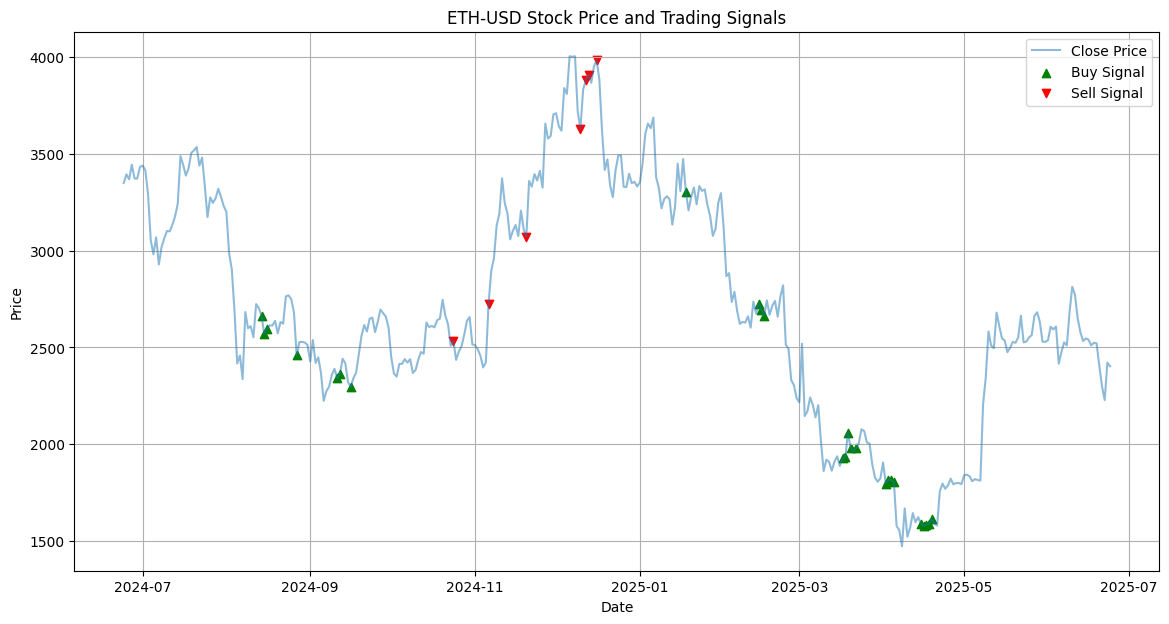

In [6]:
# === Loop Over Tickers ===
for ticker in tickers:
    print(f"\n📊 Processing {ticker}...")

    df = yf.Ticker(ticker).history(period='1y')

    if df.empty or len(df) < 60:
        print(f"⚠️ Skipping {ticker}: not enough data.")
        continue

    df['RSI'] = calculate_rsi(df)
    df['MACD'], df['Signal'] = calculate_macd(df)
    df['Buy_Signal'], df['Sell_Signal'] = generate_signals(df)

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price', alpha=0.5)
    plt.scatter(df.index, df['Buy_Signal'], label='Buy Signal', marker='^', color='green')
    plt.scatter(df.index, df['Sell_Signal'], label='Sell Signal', marker='v', color='red')
    plt.title(f'{ticker} Stock Price and Trading Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

### 📊 Interactive Charts

In [11]:
# === Loop and Plot with Plotly ===
for ticker in tickers:
    print(f"\n📊 Analyzing {ticker}...")

    df = yf.Ticker(ticker).history(period='1y')

    if df.empty or len(df) < 60:
        print(f"⚠️ Skipping {ticker}: not enough data.")
        continue

    df['RSI'] = calculate_rsi(df)
    df['MACD'], df['Signal'] = calculate_macd(df)
    df['Buy_Signal'], df['Sell_Signal'] = generate_signals(df)
   
    # Calculate Bollinger Bands
    df['SMA'] = df['Close'].rolling(window=20).mean()
    df['SD'] = df['Close'].rolling(window=20).std()
    df['UB'] = df['SMA'] + 2 * df['SD']
    df['LB'] = df['SMA'] - 2 * df['SD']

    # Interactive Plotly chart
    fig = go.Figure()

    # Close Price
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], name='Close Price', line=dict(color='lightgray')))

    # Buy Signals
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df['Buy_Signal'],
        mode='markers',
        marker=dict(symbol='triangle-up', color='green', size=10),
        name='Buy Signal'
    ))

    # Sell Signals
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df['Sell_Signal'],
        mode='markers',
        marker=dict(symbol='triangle-down', color='red', size=10),
        name='Sell Signal'
    ))

    fig.update_layout(
        title=f'{ticker} Stock Price with RSI + MACD Trading Signals',
        xaxis_title='Date',
        yaxis_title='Price',
        height=600,
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )
    
    # Bollinger Bands
    fig.add_trace(go.Scatter(x=df.index, y=df['UB'], mode='lines', name='Upper Bollinger Band', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=df.index, y=df['LB'], mode='lines', name='Lower Bollinger Band', line=dict(color='green'), fill='tonexty'))
    fig.add_trace(go.Scatter(x=df.index, y=df['SMA'], mode='lines', name='Middle Bollinger Band', line=dict(color='blue')))

    # Layout
    fig.update_layout(title=f'{ticker} Stock Price with Bollinger Bands',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  showlegend=True)


    fig.show()


📊 Analyzing NN.AS...



📊 Analyzing SHELL.AS...



📊 Analyzing ASRNL.AS...



📊 Analyzing AKSEN.IS...



📊 Analyzing ETH-USD...



📊 Analyzing NN.AS...


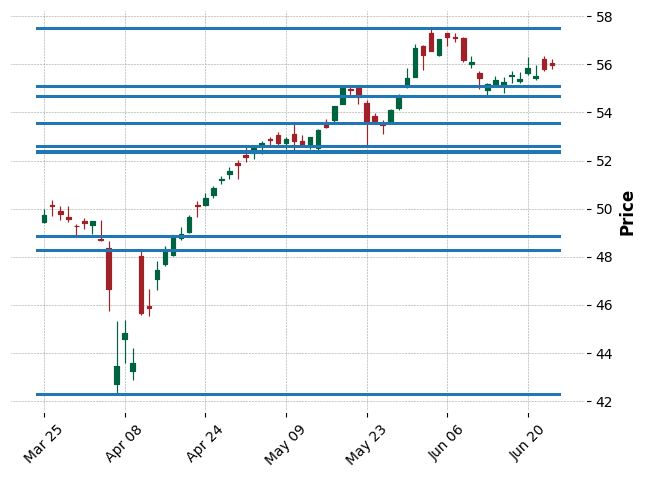


📊 Analyzing SHELL.AS...


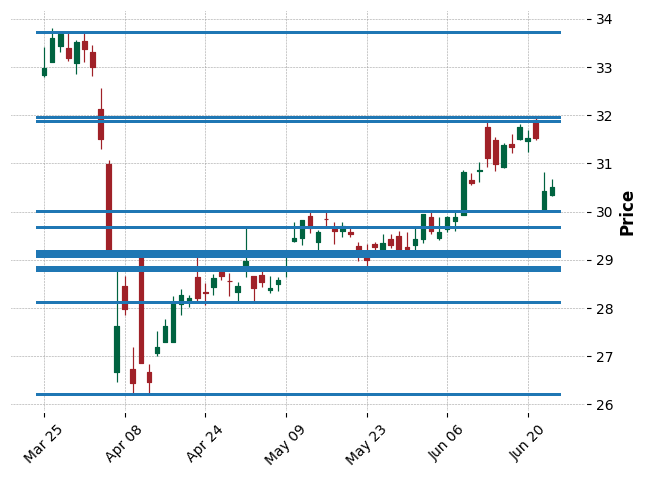


📊 Analyzing ASRNL.AS...


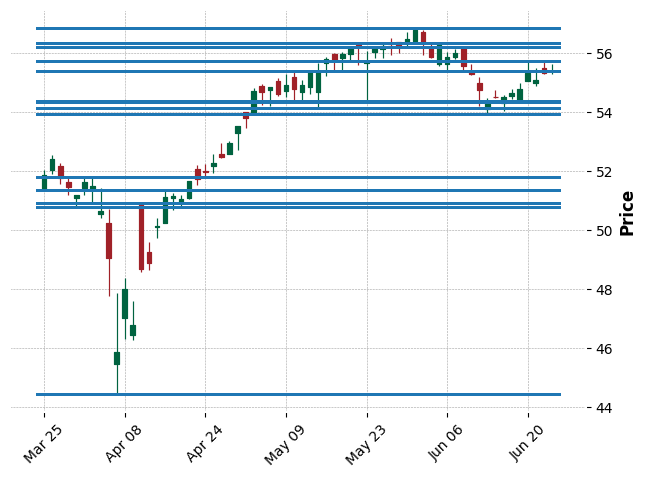


📊 Analyzing AKSEN.IS...


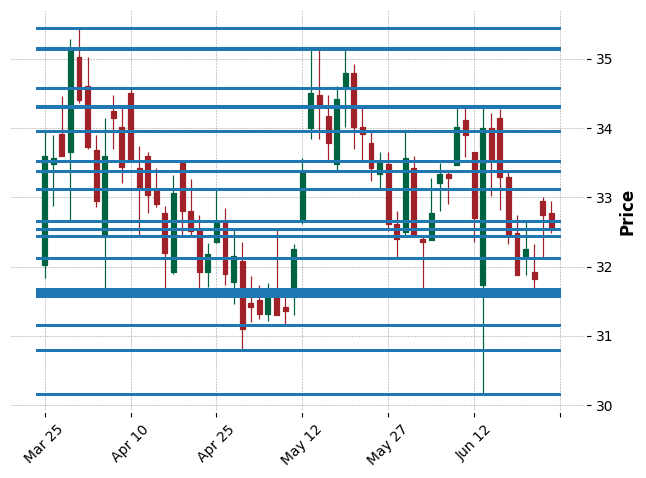


📊 Analyzing ETH-USD...


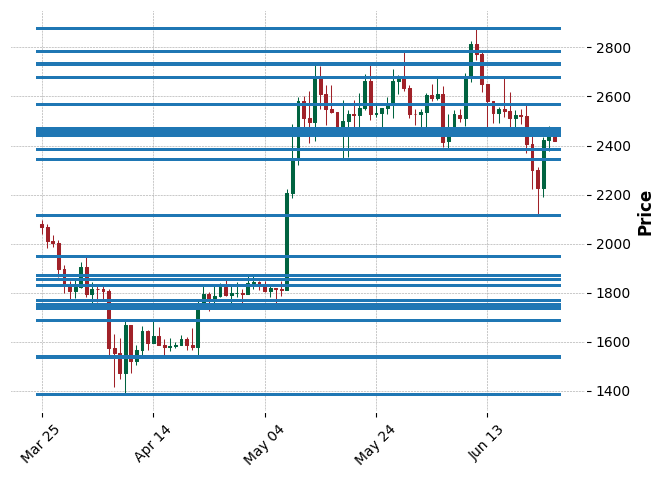

In [34]:
for ticker in tickers:
    print(f"\n📊 Analyzing {ticker}...")
    
    df = yf.Ticker(ticker).history(period='3mo')

    if df.empty or len(df) < 60:
        print(f"⚠️ Skipping {ticker}: not enough data.")
        continue
        
    supports = df[df.Low==df.Low.rolling(5,center=True).min()].Low
    resistances = df[df.High==df.High.rolling(5,center=True).max()].High
    levels = pd.concat([supports,resistances])
    
    mpf.plot(df, type ='candle', hlines=levels.to_list(), style='charles')
   

In [40]:

def analyze_stock_interactive(tickers, period='3mo'):
    """
    Interactive stock analysis with support/resistance levels
    
    Parameters:
    tickers: list of stock symbols
    period: '1mo', '3mo', '6mo', '1y', etc.
    """
    
    # Adjust minimum data requirements based on period
    min_data_points = {
        '1mo': 15,   # ~20 trading days in a month
        '3mo': 45,   # ~60 trading days in 3 months
        '6mo': 90,   # ~120 trading days in 6 months
        '1y': 180,   # ~250 trading days in a year
    }
    
    min_required = min_data_points.get(period, 30)
    
    for ticker in tickers:
        print(f"\n📊 Analyzing {ticker}...")
        
        # Get stock data
        stock = yf.Ticker(ticker)
        df = stock.history(period=period)
        
        if df.empty or len(df) < min_required:
            print(f"⚠️ Skipping {ticker}: not enough data (got {len(df)} points, need {min_required}).")
            continue
        
        # Calculate support and resistance levels
        window = min(5, len(df) // 10)  # Adjust window size based on data length
        if window < 3:
            window = 3
            
        supports = df[df['Low'] == df['Low'].rolling(window, center=True).min()]
        resistances = df[df['High'] == df['High'].rolling(window, center=True).max()]
        
        # Create interactive candlestick chart
        fig = go.Figure()
        
        # Add candlestick chart
        fig.add_trace(go.Candlestick(
            x=df.index,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            name=ticker,
            increasing_line_color='green',
            decreasing_line_color='red'
        ))
        
        # Add support levels
        for idx, row in supports.iterrows():
            fig.add_hline(
                y=row['Low'],
                line_dash="dash",
                line_color="blue",
                opacity=0.7,
                annotation_text=f"Support: ${row['Low']:.2f}",
                annotation_position="bottom right"
            )
        
        # Add resistance levels
        for idx, row in resistances.iterrows():
            fig.add_hline(
                y=row['High'],
                line_dash="dash",
                line_color="red",
                opacity=0.7,
                annotation_text=f"Resistance: ${row['High']:.2f}",
                annotation_position="top right"
            )
        
        # Add volume subplot
        fig_with_volume = make_subplots(
            rows=2, cols=1,
            shared_xaxes=True,
            vertical_spacing=0.03,
            subplot_titles=(f'{ticker} Price with Support/Resistance', 'Volume'),
            row_width=[0.2, 0.7]
        )
        
        # Add candlestick to main plot
        fig_with_volume.add_trace(go.Candlestick(
            x=df.index,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            name=ticker,
            increasing_line_color='green',
            decreasing_line_color='red'
        ), row=1, col=1)
        
        # Add volume
        fig_with_volume.add_trace(go.Bar(
            x=df.index,
            y=df['Volume'],
            name='Volume',
            marker_color='lightblue',
            opacity=0.7
        ), row=2, col=1)
        
        # Add support/resistance lines to main plot
        for idx, row in supports.iterrows():
            fig_with_volume.add_hline(
                y=row['Low'],
                line_dash="dash",
                line_color="blue",
                opacity=0.7,
                row=1,
                annotation_text=f"Support: ${row['Low']:.2f}",
                annotation_position="bottom right"
            )
        
        for idx, row in resistances.iterrows():
            fig_with_volume.add_hline(
                y=row['High'],
                line_dash="dash",
                line_color="red",
                opacity=0.7,
                row=1,
                annotation_text=f"Resistance: ${row['High']:.2f}",
                annotation_position="top right"
            )
        
        # Update layout
        fig_with_volume.update_layout(
            title=f'{ticker} Stock Analysis - {period.upper()}',
            yaxis_title='Price ($)',
            xaxis_title='Date',
            template='plotly_white',
            showlegend=True,
            height=800,
            hovermode='x unified'
        )
        
        # Remove range slider for cleaner look
        fig_with_volume.update_layout(xaxis_rangeslider_visible=False)
        
        # Show the plot
        fig_with_volume.show()
        
        # Print summary
        print(f"✅ {ticker} analysis complete:")
        print(f"   📈 Data points: {len(df)}")
        print(f"   🔵 Support levels found: {len(supports)}")
        print(f"   🔴 Resistance levels found: {len(resistances)}")
        print(f"   💰 Current price: ${df['Close'][-1]:.2f}")
        
        if not supports.empty:
            strongest_support = supports['Low'].max()
            print(f"   🔵 Strongest support: ${strongest_support:.2f}")
        
        if not resistances.empty:
            strongest_resistance = resistances['High'].min()
            print(f"   🔴 Nearest resistance: ${strongest_resistance:.2f}")

# Enhanced version with more detailed analysis
def detailed_support_resistance_analysis(ticker, period='3mo'):
    """
    Detailed analysis with multiple timeframe support/resistance detection
    """
    stock = yf.Ticker(ticker)
    df = stock.history(period=period)
    
    if df.empty:
        print(f"No data available for {ticker}")
        return
    
    # Multiple window sizes for different strength levels
    windows = [3, 5, 10, 20]
    all_supports = []
    all_resistances = []
    
    for window in windows:
        if len(df) >= window * 2:
            supports = df[df['Low'] == df['Low'].rolling(window, center=True).min()]
            resistances = df[df['High'] == df['High'].rolling(window, center=True).max()]
            
            # Add strength indicator
            supports = supports.copy()
            resistances = resistances.copy()
            supports['strength'] = window
            resistances['strength'] = window
            
            all_supports.append(supports)
            all_resistances.append(resistances)
    
    if not all_supports:
        print(f"Not enough data for analysis of {ticker}")
        return
    
    # Combine all levels
    combined_supports = pd.concat(all_supports)
    combined_resistances = pd.concat(all_resistances)
    
    # Create interactive plot
    fig = make_subplots(
        rows=2, cols=1,
        shared_xaxes=True,
        vertical_spacing=0.03,
        subplot_titles=(f'{ticker} - Detailed Support/Resistance Analysis', 'Volume'),
        row_heights=[0.7, 0.3]
    )
    
    # Add candlestick
    fig.add_trace(go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name=ticker
    ), row=1, col=1)
    
    # Add support/resistance levels with different colors for different strengths
    colors = {'3': 'lightblue', '5': 'blue', '10': 'darkblue', '20': 'navy'}
    
    for idx, row in combined_supports.iterrows():
        strength = str(int(row['strength']))
        fig.add_hline(
            y=row['Low'],
            line_dash="dot",
            line_color=colors.get(strength, 'blue'),
            opacity=0.6,
            row=1,
            annotation_text=f"S{strength}: ${row['Low']:.2f}",
            annotation_position="bottom right"
        )
    
    for idx, row in combined_resistances.iterrows():
        strength = str(int(row['strength']))
        fig.add_hline(
            y=row['High'],
            line_dash="dot",
            line_color=colors.get(strength, 'red').replace('blue', 'red'),
            opacity=0.6,
            row=1,
            annotation_text=f"R{strength}: ${row['High']:.2f}",
            annotation_position="top right"
        )
    
    # Add volume
    fig.add_trace(go.Bar(
        x=df.index,
        y=df['Volume'],
        name='Volume',
        marker_color='gray',
        opacity=0.5
    ), row=2, col=1)
    
    fig.update_layout(
        title=f'{ticker} - Multi-Timeframe Support/Resistance Analysis',
        height=900,
        template='plotly_white',
        showlegend=True,
        hovermode='x unified'
    )
    
    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.show()
    
    return df, combined_supports, combined_resistances

# Example usage:
if __name__ == "__main__":
    # Your tickers
    tickers = ['NN.AS', 'SHELL.AS','ASRNL.AS', 'AKSEN.IS', 'ETH-USD']  # Add the tickers here
    
    print("🚀 Starting Interactive Stock Analysis...")
    print("=" * 50)
    
    # Regular analysis
    analyze_stock_interactive(tickers, period='1mo')  # Now works with 1 month!
    
    # Detailed analysis for specific stock
    # detailed_support_resistance_analysis('AAPL', period='3mo')

🚀 Starting Interactive Stock Analysis...

📊 Analyzing NN.AS...


✅ NN.AS analysis complete:
   📈 Data points: 23
   🔵 Support levels found: 6
   🔴 Resistance levels found: 7
   💰 Current price: $55.88
   🔵 Strongest support: $56.34
   🔴 Nearest resistance: $55.52

📊 Analyzing SHELL.AS...


/var/folders/qy/1th4gkcx0vlb__rw8vzpddlh0000gn/T/ipykernel_9669/314569915.py:151: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



✅ SHELL.AS analysis complete:
   📈 Data points: 23
   🔵 Support levels found: 6
   🔴 Resistance levels found: 7
   💰 Current price: $30.53
   🔵 Strongest support: $31.24
   🔴 Nearest resistance: $29.55

📊 Analyzing ASRNL.AS...


/var/folders/qy/1th4gkcx0vlb__rw8vzpddlh0000gn/T/ipykernel_9669/314569915.py:151: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



✅ ASRNL.AS analysis complete:
   📈 Data points: 23
   🔵 Support levels found: 5
   🔴 Resistance levels found: 6
   💰 Current price: $55.42
   🔵 Strongest support: $55.40
   🔴 Nearest resistance: $54.74

📊 Analyzing AKSEN.IS...


/var/folders/qy/1th4gkcx0vlb__rw8vzpddlh0000gn/T/ipykernel_9669/314569915.py:151: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



✅ AKSEN.IS analysis complete:
   📈 Data points: 21
   🔵 Support levels found: 5
   🔴 Resistance levels found: 8
   💰 Current price: $32.54
   🔵 Strongest support: $32.12
   🔴 Nearest resistance: $33.00

📊 Analyzing ETH-USD...


/var/folders/qy/1th4gkcx0vlb__rw8vzpddlh0000gn/T/ipykernel_9669/314569915.py:151: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



✅ ETH-USD analysis complete:
   📈 Data points: 32
   🔵 Support levels found: 7
   🔴 Resistance levels found: 7
   💰 Current price: $2420.26
   🔵 Strongest support: $2512.59
   🔴 Nearest resistance: $2481.22


/var/folders/qy/1th4gkcx0vlb__rw8vzpddlh0000gn/T/ipykernel_9669/314569915.py:151: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



#### Interpreting Bollinger Bands

When the price moves close to the upper band (UB), it may indicate overbought conditions, suggesting a potential price reversal to the downside.

Conversely, when the price approaches the lower band (LB), it may indicate oversold conditions, suggesting a potential price reversal to the upside.

The middle band (MA) represents the average price over the specified period and can serve as a reference point.

Look for price crossovers of the bands or significant price deviations from the bands as potential trading signals.

### USD vs. EUR-adjusted Prices

In [8]:
def plot_stock_in_eur(ticker, start_date='2025-01-01'):
    """
    Interactive plot of stock price in USD vs converted to EUR using FX rate.
    """
    # Download data
    data = yf.download([ticker, 'EURUSD=X'], start=start_date, group_by='ticker')

    # Extract close prices
    stock_close = data[ticker]['Close']
    eurusd_close = data['EURUSD=X']['Close']

    # Compute price in EUR
    stock_in_eur = stock_close / eurusd_close

    # Create figure
    fig = go.Figure()

    # USD price
    fig.add_trace(go.Scatter(
        x=stock_close.index,
        y=stock_close,
        mode='lines',
        name=f'{ticker} in USD',
        line=dict(color='royalblue')
    ))

    # EUR-adjusted price
    fig.add_trace(go.Scatter(
        x=stock_in_eur.index,
        y=stock_in_eur,
        mode='lines',
        name=f'{ticker} in EUR',
        line=dict(color='green', dash='dash')
    ))

    # Layout
    fig.update_layout(
        title=f'{ticker} Stock Price: USD vs EUR-Adjusted',
        xaxis_title='Date',
        yaxis_title='Price',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        hovermode='x unified',
        template='plotly_white',
        height=600
    )

    fig.show()

In [9]:
plot_stock_in_eur("MSFT","2025-01-01")
plot_stock_in_eur("NVDA","2025-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


[*********************100%***********************]  2 of 2 completed
